<a href="https://colab.research.google.com/github/fahmida185/NN-Projects/blob/master/Assignment_2_flower_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#######################################################################
import keras.models as km
import keras.layers as kl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
import keras.utils as ku
import tensorflow as tf
import keras.regularizers as kr
import keras.optimizers as op

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("Using Tensorflow backend.")
IMG_SIZE=50
input_shape = (IMG_SIZE,IMG_SIZE,1)
numfm=32
numnodes=100
output_size=17
print("Reading flowers input file.")
print("Reading flowers target file.")
input_data_unprocessed= np.load('/content/drive/My Drive/NN_Course/Flower_data/50x50flowers.images.npy')
input_data_processed=[]
target_data= np.load('/content/drive/My Drive/NN_Course/Flower_data/50x50flowers.targets.npy')

for i in range(input_data_unprocessed.shape[0]):
    grayscale = np.dot(input_data_unprocessed[i], [0.2989, 0.5870, 0.1140])
    input_data_processed.append(grayscale)
input_data_processed=np.array(input_data_processed)  
input_data=input_data_processed
target_data=ku.to_categorical(np.asarray(target_data)-1)
input_data = input_data.reshape(input_data.shape[0],50,50,1)

Using Tensorflow backend.
Reading flowers input file.
Reading flowers target file.


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(input_data, target_data, test_size=0.40)
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.
testX = testX / 255.

In [ ]:
import keras.models as km
import keras.layers as kl
lam=0.01

print("Building network.")
input_image = kl.Input(shape = (50,50,1))
x = kl.Conv2D(32, kernel_size = (5, 5),activation = 'relu')(input_image)
x = kl.Dense(output_size, activation = 'sigmoid')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x= kl.BatchNormalization()(x)
x= kl.Dropout(0.25)(x, training = True)


x = kl.Conv2D(64, (3, 3),activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.BatchNormalization()(x)
x = kl.Dropout(0.25)(x, training = True)

x = kl.Dropout(0.25)(x , training = True)
x = kl.Flatten()(x)
x = kl.BatchNormalization()(x)
x = kl.Dense(256, activation='relu')(x)
x = kl.BatchNormalization()(x)
x = kl.Dropout(0.5)(x, training = True)
x = kl.Dense(17, name = 'output',activation = 'softmax',kernel_regularizer = kr.l2(lam))(x)


model = km.Model(inputs = input_image,outputs = x)   


model.compile( optimizer=op.rmsprop(lr=0.01, decay=1e-6), metrics = ['accuracy'], loss = "categorical_crossentropy")
print("Training network.") 



fit = model.fit(trainX,trainY, epochs = 10, batch_size = 5, verbose = 2, validation_data=(testX,testY), shuffle=True)

print(model.summary())


Building network.
Training network.
Train on 816 samples, validate on 544 samples
Epoch 1/10
 - 8s - loss: 4.1917 - accuracy: 0.0956 - val_loss: 4.5381 - val_accuracy: 0.0404
Epoch 2/10
 - 8s - loss: 3.2920 - accuracy: 0.1336 - val_loss: 3.5260 - val_accuracy: 0.0938
Epoch 3/10
 - 8s - loss: 3.0687 - accuracy: 0.1912 - val_loss: 4.1391 - val_accuracy: 0.1360
Epoch 4/10
 - 8s - loss: 3.0582 - accuracy: 0.2157 - val_loss: 4.6285 - val_accuracy: 0.1324
Epoch 5/10
 - 8s - loss: 3.0061 - accuracy: 0.2230 - val_loss: 5.5683 - val_accuracy: 0.1140
Epoch 6/10
 - 8s - loss: 2.8344 - accuracy: 0.2574 - val_loss: 3.6165 - val_accuracy: 0.1820
Epoch 7/10
 - 8s - loss: 2.7215 - accuracy: 0.2635 - val_loss: 4.1543 - val_accuracy: 0.1066
Epoch 8/10
 - 8s - loss: 2.7049 - accuracy: 0.2512 - val_loss: 4.1135 - val_accuracy: 0.1415
Epoch 9/10
 - 8s - loss: 2.5621 - accuracy: 0.2868 - val_loss: 3.6868 - val_accuracy: 0.1618
Epoch 10/10
 - 8s - loss: 2.4363 - accuracy: 0.3174 - val_loss: 3.1637 - val_accu

In [ ]:
print(model.summary())
print(trainX.shape)
print(testX.shape)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 46, 46, 32)        832       
_________________________________________________________________
dense_15 (Dense)             (None, 46, 46, 17)        561       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 17)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 23, 23, 17)        68        
_________________________________________________________________
dropout_30 (Dropout)         (None, 23, 23, 17)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 64)        9856

In [ ]:
real_Y=list(range(1,17))
testX = testX[100,:].reshape(1,50,50,1)
testY = testY[100,:].reshape(1,17)


<Figure size 576x612 with 0 Axes>

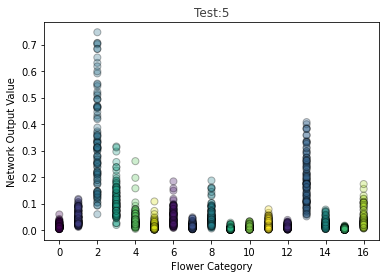

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8.5))
y_label_range=list(range(0,17))
y_pred = []
colors = [int(i*3% 17) for i in y_label_range]

fig, ax = plt.subplots()
for i in range(100):
  y_pred.append(model.predict(testX))
  ax.scatter(y_label_range,y_pred[i].ravel(),s=50.0,c=colors, alpha=0.3, edgecolors='k')
ax = plt.xlabel('Flower Category')
ax = plt.ylabel('Network Output Value')
ax = plt.title('Test:5',fontsize=12,alpha=0.75)
plt.show()